In [1]:
import acquire
import pandas as pd
import wrangle_zillow
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# acquiring the zillow data set

df = acquire.get_data()

In [3]:
# removing duplicate columns and getting only the single unit properties

zillow = wrangle_zillow.get_single_unit(df)

In [4]:
zillow

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,buildingclassdesc,propertylandusedesc,airconditioningdesc,architecturalstyledesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,Single Family Residential,None,None,None,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,Single Family Residential,None,None,None,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,Single Family Residential,None,None,None,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,Single Family Residential,None,None,Central,None,None
6,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,None,Single Family Residential,Central,None,Central,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,6.037101e+13,0.020615,2017-09-20,None,Single Family Residential,None,None,Central,None,None
77410,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,6.111008e+13,0.013209,2017-09-21,None,Single Family Residential,None,None,None,None,None
77411,1843709,12773139,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,6.037434e+13,0.037129,2017-09-21,None,Single Family Residential,Central,None,Central,None,None
77412,1187175,12826780,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,6.037503e+13,0.007204,2017-09-25,None,Single Family Residential,None,None,Central,None,None


In [5]:
# handling the missing values by requiring both columns and rows to have atleast 90% value

zillow = wrangle_zillow.handle_missing_values(zillow, .8, .6)

In [6]:
zillow

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
6,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,673515,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,...,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Single Family Residential
77410,2968375,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,...,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,Single Family Residential
77411,1843709,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,...,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Single Family Residential
77412,1187175,12826780,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,33937685.0,...,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,Single Family Residential


In [7]:
# lets check how many missing values we have left
zillow.isna().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                162
calculatedfinishedsquarefeet     107
finishedsquarefeet12             273
fips                               0
fullbathcnt                      162
latitude                           0
longitude                          0
lotsizesquarefeet                375
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1036
regionidcounty                     0
regionidzip                       26
roomcnt                            0
yearbuilt                        140
structuretaxvaluedollarcnt        82
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              125
logerror                           0
t

In [8]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52357 entries, 0 to 77413
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52357 non-null  int64  
 1   parcelid                      52357 non-null  int64  
 2   bathroomcnt                   52357 non-null  float64
 3   bedroomcnt                    52357 non-null  float64
 4   calculatedbathnbr             52195 non-null  float64
 5   calculatedfinishedsquarefeet  52250 non-null  float64
 6   finishedsquarefeet12          52084 non-null  float64
 7   fips                          52357 non-null  float64
 8   fullbathcnt                   52195 non-null  float64
 9   latitude                      52357 non-null  float64
 10  longitude                     52357 non-null  float64
 11  lotsizesquarefeet             51982 non-null  float64
 12  propertycountylandusecode     52357 non-null  object 
 13  p

In [9]:
zillow = wrangle_zillow.clean_zillow(zillow)

In [10]:
train, test, validate = wrangle_zillow.split_zillow(zillow)

train.shape, test.shape, validate.shape

((33508, 26), (10472, 26), (8377, 26))

In [11]:
# So how are we going to fill in the missing values?
# if the columns are categorical/discrete we wil used mode, if its continuous we will use median
cat_cols = [ 'fullbathcnt', 'regionidcity', 'regionidzip','yearbuilt']
cont_cols = ['censustractandblock', 'taxamount', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'lotsizesquarefeet', 
            'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt']

train, test, validate = wrangle_zillow.fill_na(train, test, validate, cat_cols = cat_cols, cont_cols = cont_cols)

In [12]:
train.isnull().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
dtype: int64

In [13]:
validate.isnull().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
dtype: int64

In [14]:
test.isnull().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
dtype: int64

## LETS START EXPLORING

In [15]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
70973,1396417,12860323,2.0,4.0,2026.0,6037.0,2.0,33994863.0,-117827729.0,8128.0,...,1981.0,189214.0,263281.0,2016.0,74067.0,3292.88,6.037403e+13,0.013614,2017-08-29,Single Family Residential
72662,450711,11225448,2.0,3.0,1051.0,6037.0,2.0,34567583.0,-117941545.0,39901.0,...,1983.0,72800.0,168000.0,2016.0,95200.0,2062.32,6.037910e+13,-0.068252,2017-09-01,Single Family Residential
71106,2097109,12788441,2.0,5.0,1875.0,6037.0,2.0,33966020.0,-118023774.0,5940.0,...,1951.0,174810.0,522149.0,2016.0,347339.0,6169.82,6.037502e+13,-0.048605,2017-08-29,Single Family Residential
71634,1616661,12049757,3.0,3.0,2013.0,6037.0,3.0,34187047.0,-118284901.0,11324.0,...,1946.0,316018.0,790047.0,2016.0,474029.0,8780.89,6.037301e+13,0.411197,2017-08-30,Single Family Residential
21627,735468,11669182,2.0,3.0,1633.0,6037.0,2.0,34046508.0,-118520331.0,5196.0,...,1936.0,177867.0,889359.0,2016.0,711492.0,10700.59,6.037263e+13,0.008659,2017-03-30,Single Family Residential


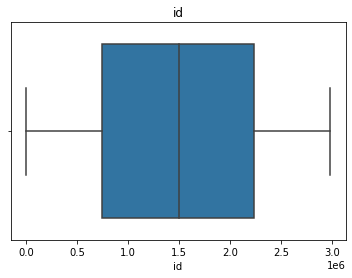

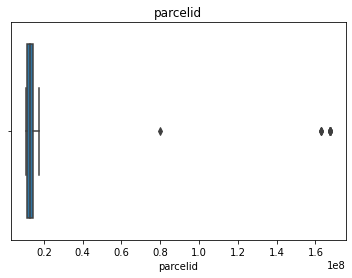

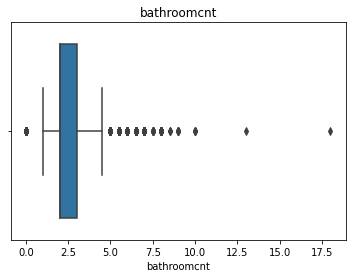

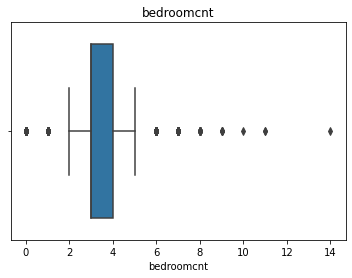

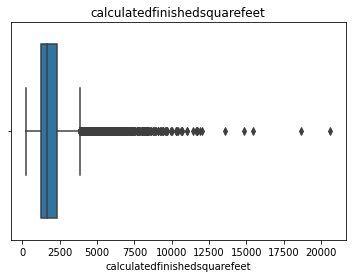

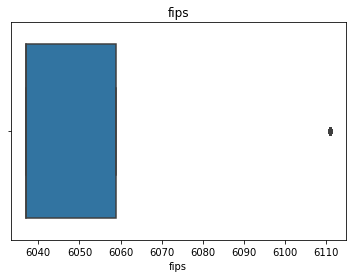

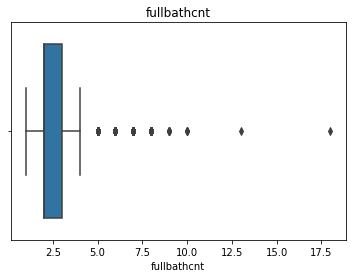

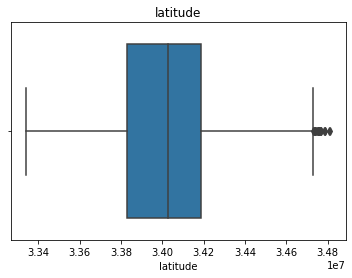

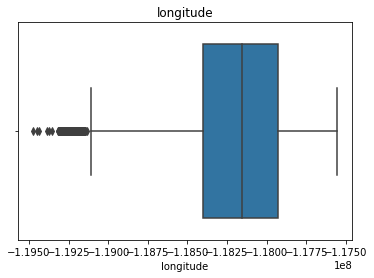

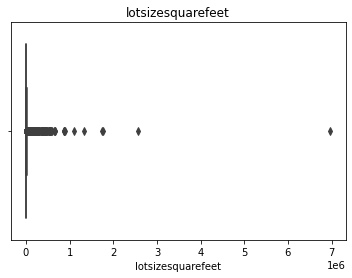

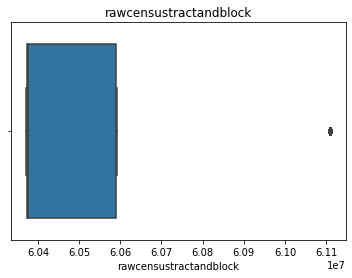

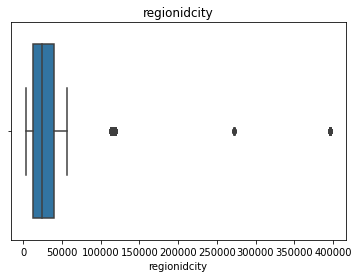

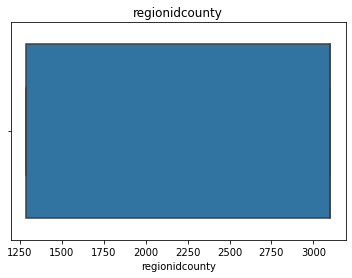

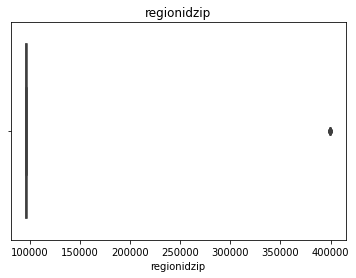

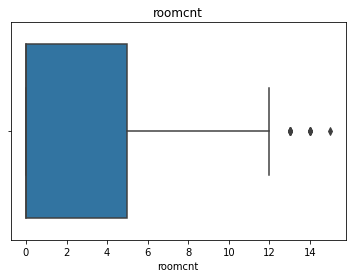

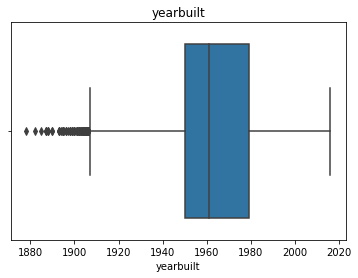

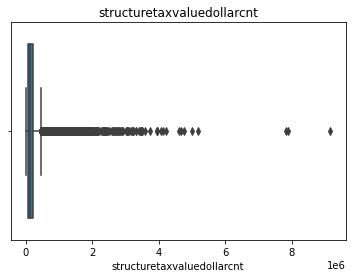

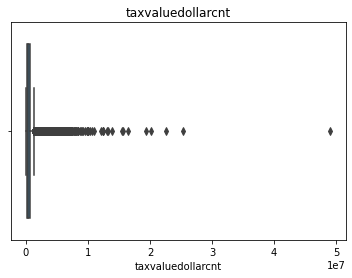

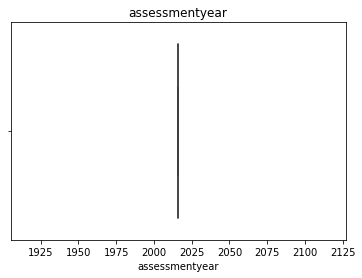

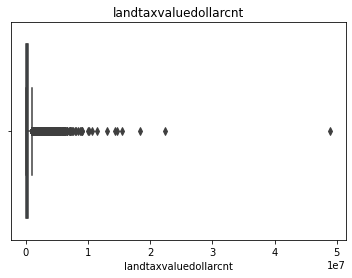

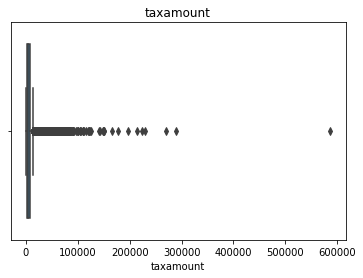

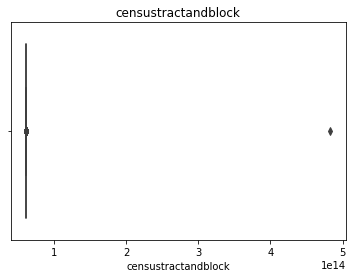

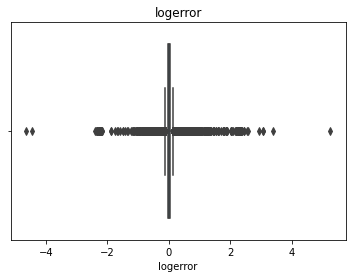

In [16]:
# lets check if we have outliers in numeric datatypes

for col in train.select_dtypes(include = 'number').columns:
    sns.boxplot(train[col])
    plt.title(col)
    plt.show()

## How is log error distributed amongst different fips code?

In [18]:
# lets groupby our data on fips and get some discriptive stats on log error

train.groupby('fips').logerror.describe()


,count,mean,std,min,25%,50%,75%,max
fips,,,,,,,,
6037.0,21651.0,0.015303,0.172120,-4.655420,-0.029759,0.006071,0.042319,5.262999
6059.0,9044.0,0.025973,0.192413,-2.406257,-0.016985,0.008731,0.039070,2.933328
6111.0,2813.0,0.012447,0.159733,-2.311473,-0.019509,0.006331,0.035831,2.177363


<AxesSubplot:>

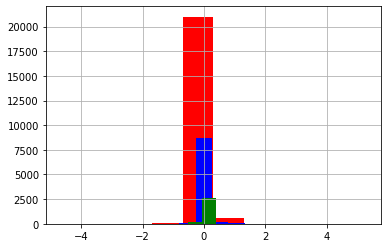

In [19]:
# plotting histogram of the log error in different fips code

ax = train[train.fips == 6037.0].logerror.hist(color = 'red')
train[train.fips == 6059.0].logerror.hist(ax = ax, color = 'blue')
train[train.fips == 6111.0].logerror.hist(ax = ax, color = 'green')

**Takeaways:**
- The log error seems evenly distributed amongst different fips code. However, the count in one area is significntly higher than the other. And there are few outlies in each

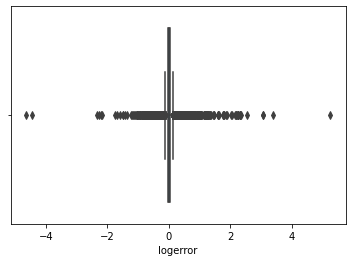

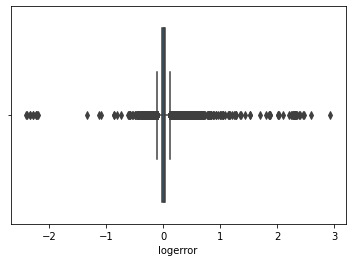

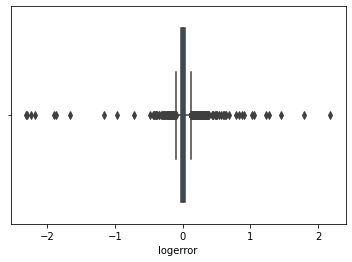

In [42]:
# plotting the boxplot of the logerror in different fips code

sns.boxplot(train[train.fips == 6037.0].logerror)
plt.show()

sns.boxplot(train[train.fips == 6059.0].logerror)
plt.show()

sns.boxplot(train[train.fips == 6111.0].logerror)
plt.show()


## Are there zipcode where the logerror is higher  or lower than the average logerror?

In [22]:
train.groupby('regionidzip').logerror.describe()

,count,mean,std,min,25%,50%,75%,max
regionidzip,,,,,,,,
95982.0,48.0,-0.001795,0.260820,-0.697602,-0.066795,-0.027431,0.064303,1.191672
95983.0,85.0,0.040367,0.167540,-0.264708,-0.046957,0.000375,0.058813,0.603451
95984.0,92.0,-0.086132,0.338920,-1.053588,-0.070416,-0.009639,0.044072,0.790644
95985.0,60.0,-0.046318,0.286728,-1.738639,-0.057392,0.004424,0.070262,0.368278
95986.0,11.0,0.013963,0.118912,-0.166263,-0.044797,-0.026362,0.106953,0.226761
...,...,...,...,...,...,...,...,...
97329.0,371.0,0.016273,0.128056,-0.382067,-0.022143,0.004909,0.031696,1.609746
97330.0,222.0,0.006543,0.134545,-0.423369,-0.032952,-0.003221,0.015736,1.332930
97331.0,9.0,0.014336,0.145481,-0.166361,-0.043370,-0.031492,0.118517,0.269494


In [23]:
from scipy import stats

In [118]:
# creating a function that runs a one sample t test and returns a list of zipcode with higher
# mean and lower mean compared to the overall average


def get_zip_with_high_logerror(df):
    zipcode = []
    for val in df.regionidzip.unique():
        a = 0.025
        x1 = df[df.regionidzip == val].logerror
        x2 = df.logerror
        t, p = stats.ttest_1samp(x1, x2.mean())
        if (t > 0) & (p < a):
            zipcode.append(val)
        
    return zipcode
def get_zip_with_low_logerror(df):
    zipcode = []
    for val in df.regionidzip.unique():
        a = 0.025
        x1 = df[df.regionidzip == val].logerror
        x2 = df.logerror
        t, p = stats.ttest_1samp(x1, x2.mean())
        if (t < 0) & (p < a):
            zipcode.append(val)
        
    return zipcode

In [119]:
high_zipcode = get_zip_with_high_logerror(train)

low_zipcode = get_zip_with_low_logerror(train)

print(high_zipcode)
print()

print(low_zipcode)

[96505.0, 96985.0, 96379.0, 96197.0, 96217.0, 96244.0, 96951.0]

[96120.0, 96242.0, 96398.0, 96415.0, 96171.0, 96005.0, 96020.0, 96293.0, 95997.0, 95984.0, 96280.0, 96026.0, 96047.0, 95989.0, 96294.0, 96326.0, 96043.0, 96943.0, 96152.0, 96097.0, 96007.0, 96134.0, 96137.0, 96237.0]


**Takeaways:**
    - there are certain zipcodes where the log error is significantly higher than the average logerror
    - and there are certain zipcodes where the log error is significantly lower than the average logerror

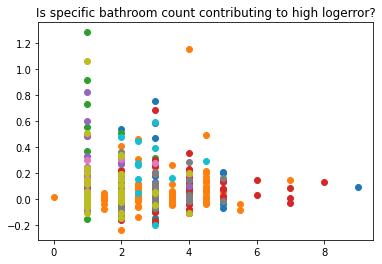

In [85]:
# Is certain bathroom count contributing to higher logerror?

for code in high_zipcode:
    plt.scatter(train[train.regionidzip == code].bathroomcnt, train[train.regionidzip == code].logerror)
    plt.title('Is specific bathroom count contributing to high logerror?')
    
   

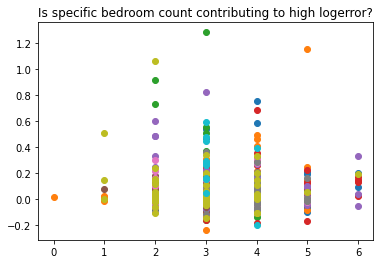

In [86]:
for code in high_zipcode:
    plt.scatter(train[train.regionidzip == code].bedroomcnt, train[train.regionidzip == code].logerror)
    plt.title('Is specific bedroom count contributing to high logerror?')

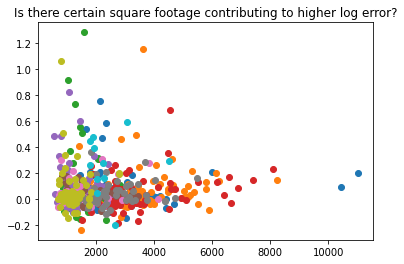

In [87]:
for code in high_zipcode:
    plt.scatter(train[train.regionidzip == code].calculatedfinishedsquarefeet, train[train.regionidzip == code].logerror)
    plt.title('Is there certain square footage contributing to higher log error?')
    
#     train.calculatedfinishedsquarefeet.hist(ax = ax)


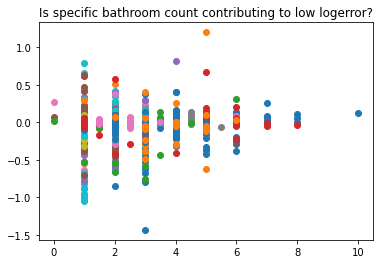

In [91]:
for code in low_zipcode:
    plt.scatter(train[train.regionidzip == code].bathroomcnt, train[train.regionidzip == code].logerror)
    plt.title('Is specific bathroom count contributing to low logerror?')

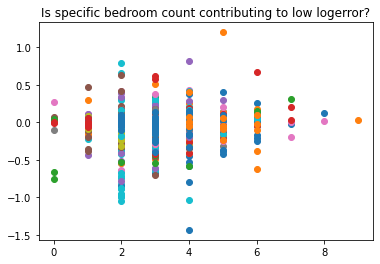

In [92]:
for code in low_zipcode:
    plt.scatter(train[train.regionidzip == code].bedroomcnt, train[train.regionidzip == code].logerror)
    plt.title('Is specific bedroom count contributing to low logerror?')

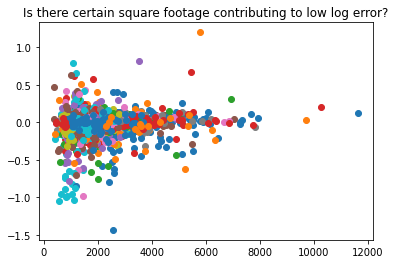

In [93]:
for code in low_zipcode:
    plt.scatter(train[train.regionidzip == code].calculatedfinishedsquarefeet, train[train.regionidzip == code].logerror)
    plt.title('Is there certain square footage contributing to low log error?')

Text(0.5, 1.0, 'lat vs long')

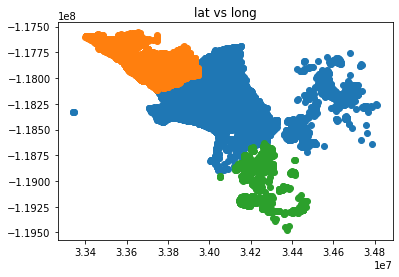

In [51]:
plt.scatter(train[train.fips == 6037.0].latitude, train[train.fips == 6037.0].longitude)

plt.scatter(train[train.fips == 6059.0].latitude, train[train.fips == 6059.0].longitude)

plt.scatter(train[train.fips == 6111.0].latitude, train[train.fips == 6111.0].longitude)
plt.title('lat vs long')

Takeaways:
- theres is a clear distinction between different fips except blue. there are observations that are clearly outliers
    
    

### How does number of bathroom count influence avg log error

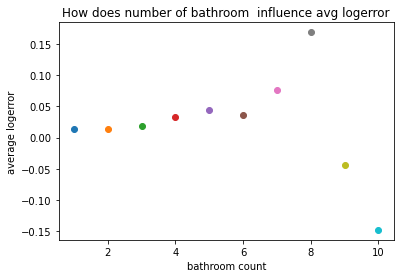

In [117]:
val =[1,2,3,4,5,6,7, 8, 9, 10]
for num in val:
    plt.scatter(num, train[train.bathroomcnt == num].logerror.mean())
    plt.title('How does number of bathroom  influence avg logerror')
    plt.xlabel('bathroom count')
    plt.ylabel('average logerror')

Takeaway:
- as the number of bathroom increases, the log error increases to positive and then drops significantly to negative for 9 and 10

### How does number of bedroom count influence avg log error

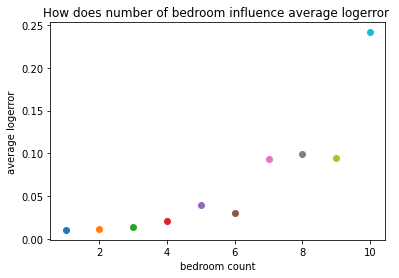

In [115]:
val =[1,2,3,4,5,6,7, 8, 9, 10]
for num in val:
    plt.scatter(num, train[train.bedroomcnt == num].logerror.mean())
    plt.xlabel('bedroom count')
    plt.ylabel('average logerror')
    
    plt.title('How does number of bedroom influence average logerror ')

takeaways:
- as the number of bedroom increases the logerror increases and as the count gets higher (7,8,9,10), the average log error is significantly higher